In [20]:
import pandas as pd
import numpy as np
import re
tweets  = pd.read_csv('EPAMSYSTEMS_tweets.csv')

# remove @ and # 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

# remove twitter handles (@user)
tweets['remove_rate_tweet'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")
tweets['remove_rate_tweet'].head(10)



0    b'Download our latest brochure to learn how EP...
1    b'In this blog, we share an extensive guide to...
2    b'#LiquidityManagement is undergoing seismic c...
3    b'This year, EPAM partnered with the Message o...
4    b'At #BioProcess International US 2019,  inter...
5    b'., Head of Google Competency at EPAM, shares...
6    b'We\xe2\x80\x99re happily reflecting on our t...
7    b'Having a strong #WorkforceManagement and pla...
8    b'The holiday season is here! Take a look at o...
9    b'EPAM has a proven track record of creating e...
Name: remove_rate_tweet, dtype: object

In [21]:
# remove special characters, numbers, punctuations
tweets['remove_rate_tweet'] = tweets['remove_rate_tweet'].str.replace("[^a-zA-Z#]", " ")
tweets['remove_rate_tweet'].head(10)

0    b Download our latest brochure to learn how EP...
1    b In this blog  we share an extensive guide to...
2    b #LiquidityManagement is undergoing seismic c...
3    b This year  EPAM partnered with the Message o...
4    b At #BioProcess International US        inter...
5    b    Head of Google Competency at EPAM  shares...
6    b We xe  x   x  re happily reflecting on our t...
7    b Having a strong #WorkforceManagement and pla...
8    b The holiday season is here  Take a look at o...
9    b EPAM has a proven track record of creating e...
Name: remove_rate_tweet, dtype: object

In [22]:
# removing short words len less thn 3

tweets['remove_rate_tweet'] = tweets['remove_rate_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweets['remove_rate_tweet'].head(10)

0    Download latest brochure learn EPAM Cloud Pipe...
1    this blog share extensive guide loyalty progra...
2    #LiquidityManagement undergoing seismic change...
3    This year EPAM partnered with Message Hope Fou...
4    #BioProcess International interviewed EPAM Jef...
5    Head Google Competency EPAM shares with Anthos...
6    happily reflecting time Automotive Europe look...
7    Having strong #WorkforceManagement planning to...
8    holiday season here Take look infographic lear...
9    EPAM proven track record creating enterprise l...
Name: remove_rate_tweet, dtype: object

In [23]:
#splitting the words using tokens

tokenized_tweet = tweets['remove_rate_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Download, latest, brochure, learn, EPAM, Clou...
1    [this, blog, share, extensive, guide, loyalty,...
2    [#LiquidityManagement, undergoing, seismic, ch...
3    [This, year, EPAM, partnered, with, Message, H...
4    [#BioProcess, International, interviewed, EPAM...
Name: remove_rate_tweet, dtype: object

In [25]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head(10)

0    [download, latest, brochur, learn, epam, cloud...
1    [thi, blog, share, exten, guid, loyalti, progr...
2    [#liquiditymanag, undergo, seismic, chang, und...
3    [thi, year, epam, partner, with, messag, hope,...
4    [#bioprocess, intern, interview, epam, jeff, a...
5    [head, googl, compet, epam, share, with, antho...
6    [happili, reflect, time, automot, europ, look,...
7    [have, strong, #workforcemanag, plan, tool, cr...
8    [holiday, season, here, take, look, infograph,...
9    [epam, proven, track, record, creat, enterpri,...
Name: remove_rate_tweet, dtype: object

In [26]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

tweets['remove_rate_tweet'] = tokenized_tweet

Note: you may need to restart the kernel to use updated packages.


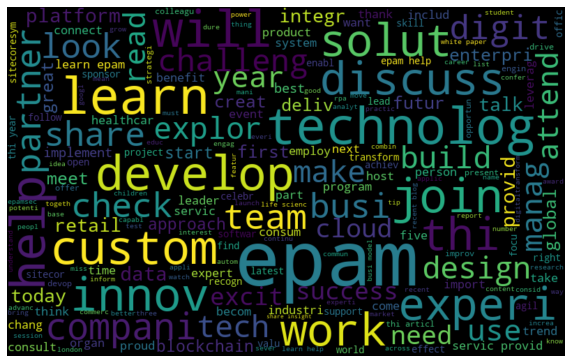

In [30]:
#data visualization. Start wtih word count
all_words = ' '.join([text for text in tweets['remove_rate_tweet']])
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()